# Сборный проект [Анализ игровой индустрии]

**Цель проекта -** выявить параметры, определяющие успешность игры.

**Для чего мы анализирум данные:** это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

В датасете представлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Задачи исследования

## Шаг 1. Изучение данных

**Путь к файлу на рабочем компьютере:**

/C:/Users/.../Рабочий стол/games.csv


## Шаг 2. Подготовка данных

1. Замените названия столбцов

2. Приведите данные к нужным типам:

Опишите, в каких столбцах пришлось заменить тип данных и почему

3. Обработайте пропуски при необходимости:

Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

Опишите возможные причины возникновения пропусков

4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

# Шаг 3. Исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

4. Не учитывайте в работе данные за предыдущие годы.

5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

8. Соотнесите выводы с продажами игр на других платформах.

9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

# Шаг 4. Составим портрет пользоватяля каждого региона

**Для пользователей каждого региона (Северная Америка, Европа и Россия) определим:**

1. топ-5 предпочтительных жанров

2. топ-5 предпочтительных платформ

3. какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

# Шаг 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2. средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясним:

1. как вы формулировали нулевую и альтернативную гипотезы

2. какой критерий использовали для проверки гипотез и почему

# Шаг 6. Результаты исследования

- Общие выводы

- Рекомендации

# Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

...

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Шаг 1. Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8) 
plt.style.use('ggplot')  

### Посмотрим на таблицу с играми

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
games = pd.read_csv('/datasets/games.csv')

games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11078,Shin Ken to Mah? to Gakuenmono. Toki no Gakuen,PSP,2012.0,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,NaN
5102,Guitar Hero On Tour: Modern Hits,DS,2009.0,Misc,0.13,0.20,0.00,0.04,70.0,6.3,E10+
14529,Kyokugen Dasshutsu ADV: Zennin Shiboudesu,3DS,2012.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3323,Dark Souls II,PS4,2015.0,Role-Playing,0.21,0.23,0.08,0.09,NaN,NaN,NaN
6286,Pro Race Driver,PS2,2002.0,Racing,0.13,0.10,0.00,0.03,81.0,8.5,T


In [8]:
games.duplicated().sum()

0

In [9]:
games.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

**Выводы:**
1. мы видим значительные пропуски в столбцах Critic_Score, User_Score, Rating, сложно пока предположить, с чем они могут быть связаны
2. также наблюдаются незначительные пропуски Name, Year_of_Release, Genre 
3. дубликатов не обнаружено


# Шаг 2. Предобработка данных

1. Замените названия столбцов

2. Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

3. Приведите данные к нужным типам:

Опишите, в каких столбцах пришлось заменить тип данных и почему

4. Обработайте пропуски при необходимости:

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;

Опишите возможные причины возникновения пропусков

### Заменим названия столбцов

In [10]:
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [11]:
cols = ['game_name',
        'platform',
        'year_of_release',
        'genre',
        'na_sales',
        'eu_sales',
        'ru_sales',
        'other_sales',
        'critic_score',
        'user_score',
        'rating_type']
games.set_axis(cols, axis='columns', inplace=True)

In [12]:
games.columns.tolist()

['game_name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'ru_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating_type']

### Посчитаем количество продаж во всех регионах (пока оставить)

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['ru_sales'] + games['other_sales']
games.head(2)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


### Приведем данные к нужным типам и обработаем пропуски

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
ru_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating_type        9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


Какие данные нужно привести к другому типу и почему:
1. year_of_release, потому что сейчас после года идет 0 после запятой.
2. приведем user_score к целочисленному типу

na_sales, eu_sales, ru_sales, other_sales менять не будем, потому что избавление от знаков после запятой приведет к потере данных.

Помимо этого для лучшего восприятия сделаем все заглавные буквы строчными в строчных значениях.

In [15]:
games['game_name'] = games['game_name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating_type'] = games['rating_type'].str.lower()

In [16]:
games.head(20)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Обработаем пропуски

In [17]:
games.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
ru_sales              0
other_sales           0
total_sales           0
game_name             2
genre                 2
year_of_release     269
user_score         6701
rating_type        6766
critic_score       8578
dtype: int64

Обнаружено 6 столбцов с пропусками, разберемся с каждым из них:

1. Critic_Score - обнаружено 8578 пропусков, которые было бы некорректно заменить средним по какому-либо столбцу, потому что это сильно повлияет на данные, поэтому заполним их маркером -1.

2. Rating - обнаружено 6766 пропусков, которые было бы некорректно заменить средним по какому-либо столбцу, потому что это сильно повлияет на данные, поэтому заполним их маркером 'no rating'.

3. User_Score - обнаружено 6701 пропусков, которые было бы некорректно заменить средним по какому-либо столбцу, потому что это сильно повлияет на данные, поэтому заполним их маркером -1, а значения tld заполним на 'nan'.

4. Year_of_Release - обнаружено 269 пропусков, слишком много, чтобы удалить, заменим маркером 2999, чтобы видеть, где эти значения и чтобы они не повлияли да дальнейшую аналитику.

5. Genre - в этом столбце всего 2 пропуска, заполним их значением 'no genre', потому что удалять их или заменять 0 было бы некорректно

6. Name - в этом столбце всего 2 пропуска, заполним их значением 'no name', потому что удалять их или заменять 0 было бы некорректно

Пропуски в рейтингах, как пользовательских, так и критиков могут появляться по разным причинам. Возможно, сама игра не понравилась, и отзыв на не просто не был написан, возможно это ошибка в сохранении данных и т.д.
Ошибки в пропусках года релиза, названия игры и жанры критичны, потому что эти значения являются критичными, они могли возникнуть как из-за технических проблем, так и из-за невнимательности.

In [18]:
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)
games['rating_type'] = games['rating_type'].fillna('no rating')
games['genre'] = games['genre'].fillna('no genre')
games['game_name'] = games['game_name'].fillna('no name')

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
ru_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null object
rating_type        16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [20]:
# посмотрим на user_score. видим выбивающеес значение tdl
games['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
# посчитаем количество значений с tdl
# тут же изменим тит данных на численный, потому что раньше это приводило к ошибке из-за большого количества пропусков
games[games['user_score'] == 'tbd']['user_score'].count()

2424

In [22]:
# так как мы не можем точно сказать, чем заполнить данный пропуск, поставим nan
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [23]:
games['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  nan,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [24]:
# тут же изменим тит данных на численный, потому что раньше это приводило к ошибке из-за большого количества пропусков
games['year_of_release'] = games['year_of_release'].fillna(2999)
games['year_of_release'] = games['year_of_release'].astype('int')

In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
ru_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         14291 non-null float64
rating_type        16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [26]:
games.isna().sum().sort_values()

game_name             0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
ru_sales              0
other_sales           0
critic_score          0
rating_type           0
total_sales           0
user_score         2424
dtype: int64

**Вывод:**
1. Были изменены типы данных на целочисленные
2. Были заполнены пропуски в соответствии с конкретными условиями

# Шаг 3. Исследовательский анализ данных

### 1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

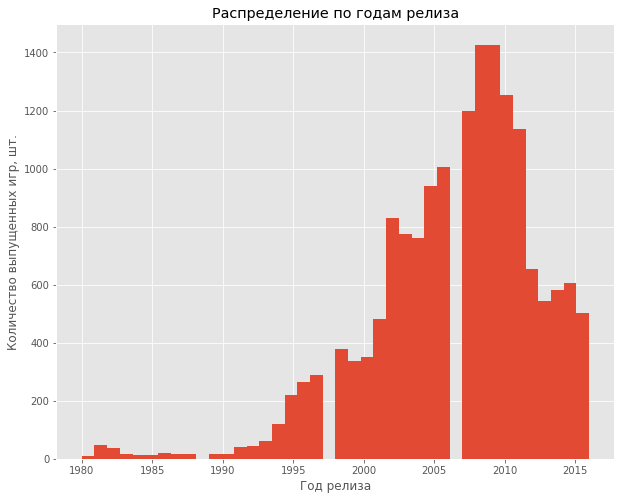

In [27]:
ax = games[games['year_of_release'] != 2999]['year_of_release'].plot(kind='hist', bins=40)
plt.title('Распределение по годам релиза')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр, шт.')
plt.show();

В 1980-1990-е игры выпускались мало, поэтому не будем брать в расчет этот период. Подъем активности этой индустрии начинается примерно с 1995 г., хотя все он еще мал. После 1995 года наблюдается постоянный рост вплоть до примерно 2007 и некоторый стопор в развитиии. С 2008-2010 года наблюдается явное снижение активности производителей игр, что скорее всего связано с мировым кризисом. После этого небольшое восстановление приходит в 2013-2014 году.

### 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сначала посмотрим на то, как менялись общие продажи по годам. 

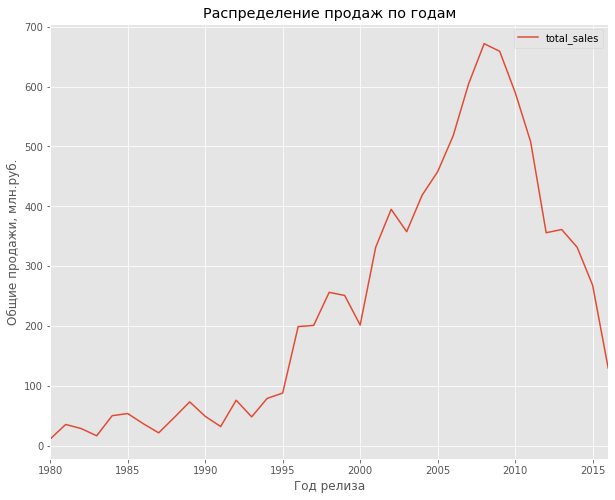

In [28]:
games[games['year_of_release'] != 2999].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title('Распределение продаж по годам')
plt.xlabel('Год релиза')
plt.ylabel('Общие продажи, млн.руб.')
plt.show();

Аналогично с предыдущим распределением по выпущенным играм, наибольшие продажи наблюдаются в 2005-2010 годах.До этого рост, потом спад.

In [29]:
games['platform'].unique()


array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [30]:
total_platform_sales = games.groupby('platform').agg({'total_sales':'sum'})
total_platform_sales

,total_sales
platform,
2600,96.98
3do,0.10
3ds,259.00
dc,15.95
ds,806.12
gb,255.46
gba,317.85
gc,198.93
gen,30.77


In [31]:
super_total_platform_sales = games.groupby('platform').agg({'total_sales':'sum'}).query('total_sales > 700')
super_total_platform_sales

,total_sales
platform,
ds,806.12
ps,730.86
ps2,1255.77
ps3,939.65
wii,907.51
x360,971.42


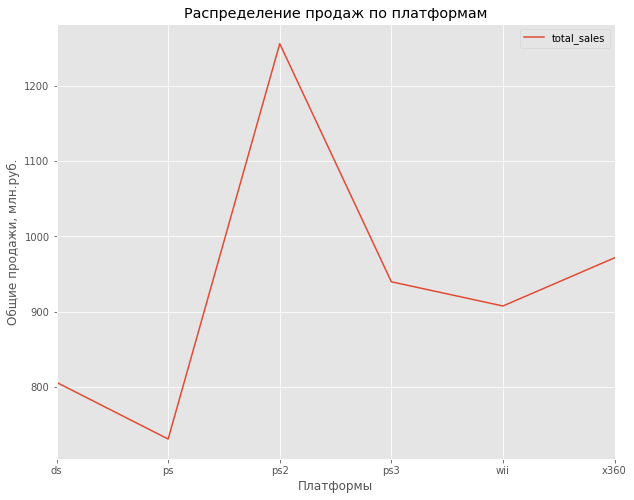

In [32]:
games.groupby('platform').agg({'total_sales':'sum'}).query('total_sales > 700').plot()

plt.title('Распределение продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн.руб.')
plt.show();

Из графика видно, что наибольшие продажи были у ps2, немного отстают ps3, wii, x360. У всех остальных продажи меньше 900.

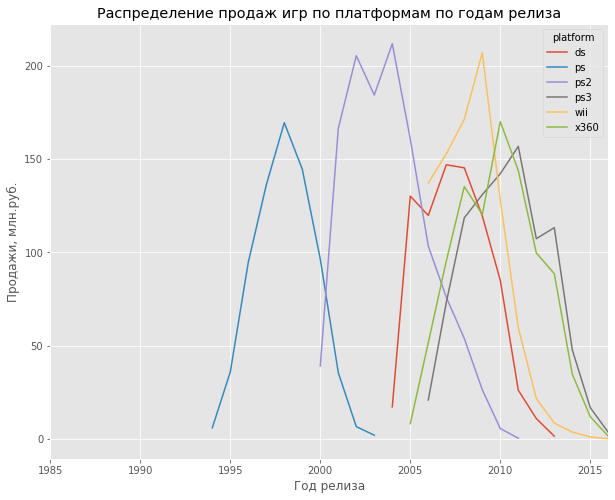

In [33]:
games.query("(year_of_release != 2999) and (platform in ['ds','ps','ps2','ps3','wii','x360'])").pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Распределение продаж игр по платформам по годам релиза')
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн.руб.')
plt.show();

Данный график показываем над картину самых денежные платформ по их общим продажам за все года. 
Мы видим, что как бы ни была популярна та или инач платформа. она достигает своего пика популярности и быстро теряет актуальность. На смену ей быстро приходит другая, и цикл повторяется.

Посмотрим данные за актуальный период. Будем брать после 2010 года, потому что ситуация в мире сильно поменялась после мирового кризиса и подъем 2006-2008 года уже не актуален, тем более, еще более ранние данные.

Посмотрим в разных приближениях.

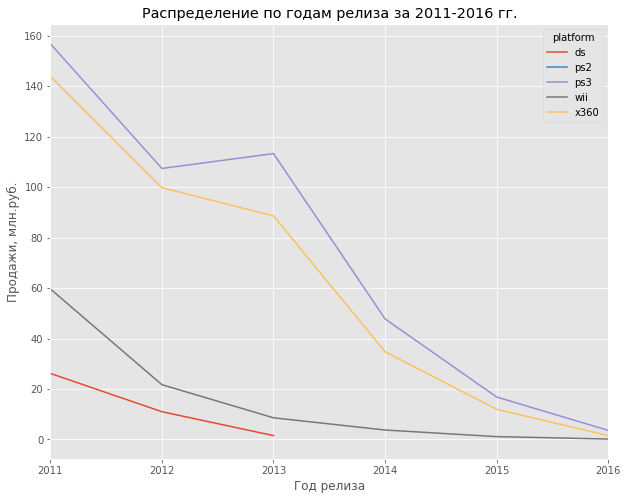

In [34]:
games.query("(year_of_release != 2999) and (year_of_release > 2010) and (platform in ['ds','ps','ps2','ps3','wii','x360'])").pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Распределение по годам релиза за 2011-2016 гг.')
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн.руб.')
plt.show();

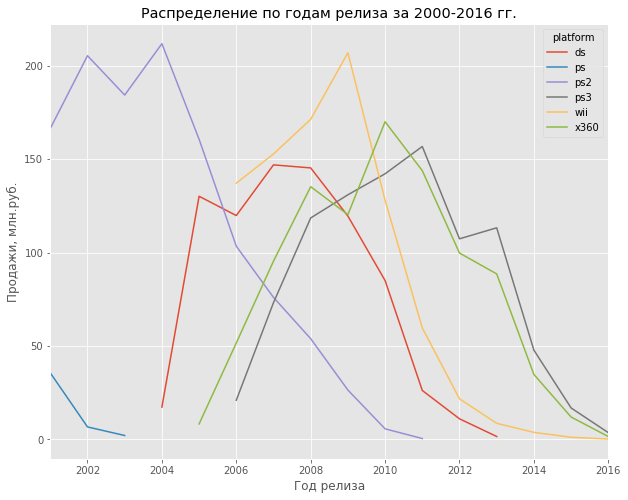

In [35]:
games.query("(year_of_release != 2999) and (year_of_release > 2000) and (platform in ['ds','ps','ps2','ps3','wii','x360'])").pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Распределение по годам релиза за 2000-2016 гг.')
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн.руб.')
plt.show();

Из последнего графика, который показывает самые денежные платформы вышедшие в 2011-2016 годы, мы видим, что ps3 и x360 являлись самыми популярными, но к 2016 году их популярность упала почти до 0.Остальные платформы были не столь популярними и падение их продаж не так заметно. В целом, можно сказать, что рынок игр сейчас в упадке и претерпевает изменения (мировой прогрессе меняет взгляды людей на игры, поэтому то, что было популярно 5 лет назад. сейчас совсем не актуально).

Вопрос сотоял в том, чтобы определить характерный промежуток времени между исчезноверием старой игры и появлением новой. Но мы не можем даль точный ответ, потому что за актуальный период примерно в одно и то же время появилось несколько наиболее популярных игр. Можно лишь заметить, что наиболее качественные игры живут не более 10 лет и им постоянно приходится бороться с конкуренцией, потому что через пару лет после выхода новой игры другая платформа выпускает свою игру.

### 3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Как было отмечено ранее, платформамо с наибольшими продажами являются:

In [36]:
games.groupby('platform').agg({'total_sales':'sum'}).query('total_sales > 700')


,total_sales
platform,
ds,806.12
ps,730.86
ps2,1255.77
ps3,939.65
wii,907.51
x360,971.42


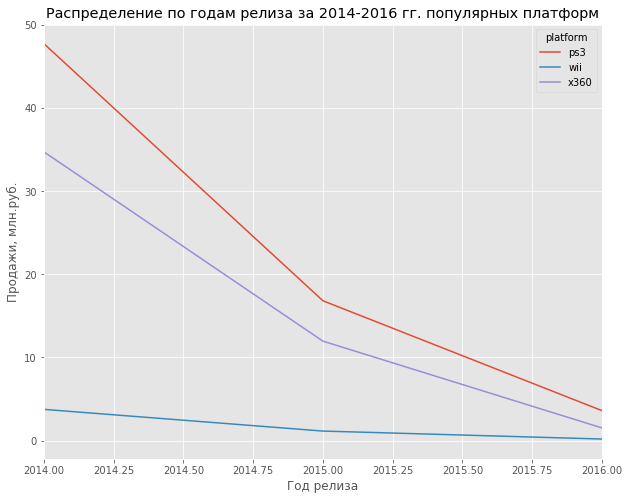

In [37]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ds','ps','ps2','ps3','wii','x360'])").pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Распределение по годам релиза за 2014-2016 гг. популярных платформ')
plt.xlabel('Год релиза')
plt.ylabel('Продажи, млн.руб.')
plt.show();

И как можно заметить из графика, к 2016 году из популярных платформ остались только wii, ps3 и x360, но их развитие не внушает доверия. Поэтому посмотрим на все платформы за актуальный период.

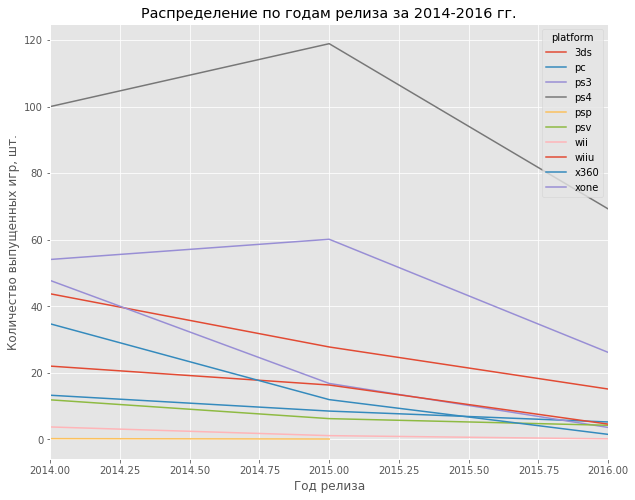

In [38]:
games.query("(year_of_release != 2999) and (year_of_release > 2013)").pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Распределение по годам релиза за 2014-2016 гг.')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр, шт.')
plt.show();

Сразу напрашивается вывод: самые прибыльные платформы сейчас не самые популярные. Сейчас все представленные платформы теряют свою популярность, но шанс еть еще у ps4, xone и 3ds.

### 4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [39]:
boxplot = games.query("(year_of_release > 2013) and (platform in ['ps4','3ds','xone'])")
boxplot

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no rating,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,no rating,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,no rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,zombiu,xone,2016,action,0.00,0.01,0.00,0.00,-1.0,-1.0,no rating,0.01
16660,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,no rating,0.01
16668,fujiko f. fujio characters: great assembly! sl...,3ds,2014,action,0.00,0.00,0.01,0.00,-1.0,-1.0,no rating,0.01
16672,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,-1.0,NaN,m,0.01


In [40]:
games1 = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4','3ds','xone'])")
games1.groupby('platform').agg({'total_sales':'mean'})

,total_sales
platform,
3ds,0.408868
ps4,0.766356
xone,0.615614


In [41]:
games1.groupby('platform').agg({'total_sales':'sum'})

,total_sales
platform,
3ds,86.68
ps4,288.15
xone,140.36


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


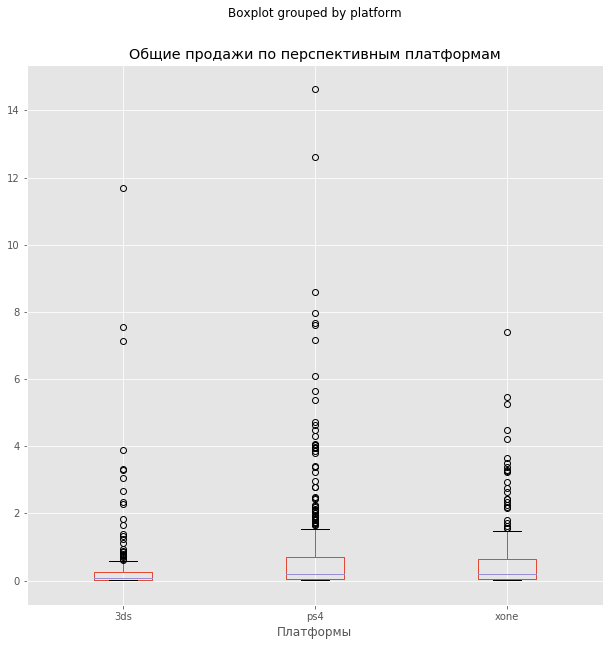

In [42]:
plot = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4','3ds','xone'])").boxplot('total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформы')
plt.title('Общие продажи по перспективным платформам')
plt.show();

Наибольший разброс наблюдается у ps4, а также у 3ds, наиболее стабильные продажи у xone, но ps4, с его огромным количествои игр, побеждат по продажам. По среднему значению наблюдается та же картина: 0.7 у ps4 и 0,62 у xone.

### 5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Посмотрим срез по ps4 за последние 3 года. И видим, что у многих игр просто нет пользовательских отзывов, но это им не мешает быть хотя и не в топе, но не выбиваться из ряда игр, оцененных пользователем.

In [43]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4'])").head(20)


,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no rating,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,no rating,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,m,7.17
143,fifa 15,ps4,2014,sports,0.80,4.33,0.05,0.90,82.0,5.7,e,6.08
154,destiny,ps4,2014,shooter,2.49,2.07,0.16,0.92,76.0,6.1,t,5.64
171,uncharted 4: a thief's end,ps4,2016,shooter,1.85,2.50,0.19,0.85,93.0,7.9,t,5.39


Посмотрим теперь только с отзывами:

In [44]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4']  and user_score > 0)").sort_values(by='user_score', ascending = False).head(200)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
303,the witcher 3: wild hunt,ps4,2015,role-playing,1.02,2.13,0.23,0.59,92.0,9.2,m,3.97
1107,dark souls iii,ps4,2016,role-playing,0.65,0.45,0.34,0.22,89.0,8.8,m,1.66
8886,the king of fighters xiv,ps4,2016,fighting,0.07,0.02,0.04,0.02,79.0,8.7,t,0.15
4676,farming simulator 17,ps4,2016,simulation,0.05,0.31,0.00,0.06,69.0,8.7,e,0.42
5120,rocket league,ps4,2016,sports,0.03,0.28,0.00,0.05,85.0,8.7,e,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...
9197,7 days to die,ps4,2016,action,0.04,0.08,0.00,0.02,45.0,5.9,m,0.14
10724,ultra street fighter iv,ps4,2015,fighting,0.00,0.08,0.00,0.01,71.0,5.9,t,0.09
7755,bound by flame,ps4,2014,role-playing,0.08,0.09,0.00,0.03,53.0,5.9,m,0.20
420,madden nfl 16,ps4,2015,sports,2.34,0.30,0.00,0.60,83.0,5.9,e,3.24


Мы видим, что пропами многие продаваемые игры. То есть вывод: отсутствие пользовательских отзывов не говорит о неполуляности и отсутствии прибыли от игры.

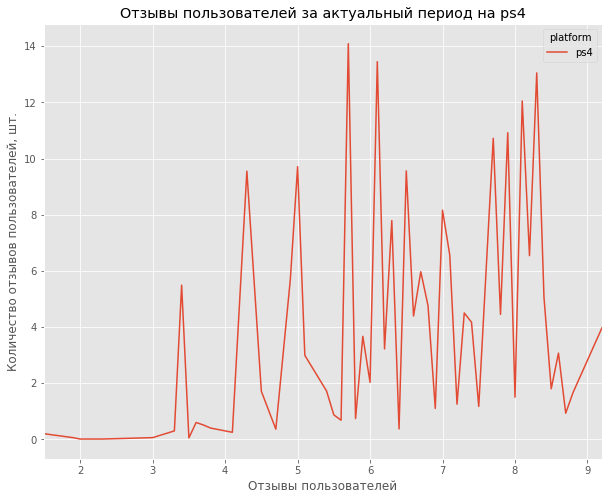

In [45]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (user_score > 0) and platform in ['ps4']").pivot_table(index = 'user_score', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Отзывы пользователей за актуальный период на ps4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество отзывов пользователей, шт.')
plt.show();


Мы видим, что у ps4 присутствую самые разные отзывы, даже около 0. Но это не мешает платформе быть наиболее перспективной и доходной. 

Теперь посмотрим на отзывы критиков:

In [46]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4'])").head(20)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no rating,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,no rating,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,m,7.17
143,fifa 15,ps4,2014,sports,0.80,4.33,0.05,0.90,82.0,5.7,e,6.08
154,destiny,ps4,2014,shooter,2.49,2.07,0.16,0.92,76.0,6.1,t,5.64
171,uncharted 4: a thief's end,ps4,2016,shooter,1.85,2.50,0.19,0.85,93.0,7.9,t,5.39


In [47]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4']  and critic_score > 0)").sort_values(by='critic_score', ascending = False).head(200)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
390,metal gear solid v: the phantom pain,ps4,2015,action,1.09,1.36,0.49,0.48,93.0,8.2,m,3.42
171,uncharted 4: a thief's end,ps4,2016,shooter,1.85,2.50,0.19,0.85,93.0,7.9,t,5.39
623,bloodborne,ps4,2015,action,1.03,0.81,0.26,0.38,92.0,8.6,m,2.48
303,the witcher 3: wild hunt,ps4,2015,role-playing,1.02,2.13,0.23,0.59,92.0,9.2,m,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...
11839,toy soldiers: war chest,ps4,2015,action,0.06,0.00,0.00,0.01,62.0,7.7,no rating,0.07
15115,here they lie,ps4,2016,adventure,0.00,0.02,0.00,0.00,62.0,6.5,m,0.02
14980,legend of kay anniversary,ps4,2015,action,0.00,0.02,0.00,0.00,62.0,6.4,e10+,0.02
1775,wwe 2k15,ps4,2014,sports,0.39,0.57,0.00,0.19,62.0,5.1,t,1.15


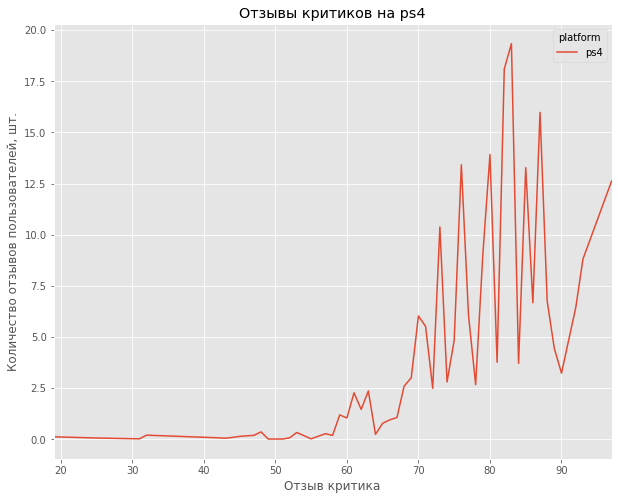

In [48]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (critic_score > 0) and platform in ['ps4']").pivot_table(index = 'critic_score', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Отзывы критиков на ps4')
plt.xlabel('Отзыв критика')
plt.ylabel('Количество отзывов пользователей, шт.')
plt.show();

Мнения критиков не так сильно варьируется, как у пользователей, преобладает 40-90 из 100. И да, от мнения критиков зависят продажи потому что в отличии от пользовательских графиков, игры, которые отметили критики, имеют довольно большие продажи. 

Хотя этот момент требует дополнительного изучения из-за того, что пропущено большое количество пользовательских отзывов.

Корреляция по всем платформам:

In [49]:
critic_score = games[games['critic_score'] != -1]
user_score = games[games['user_score'] != -1]

In [50]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']

In [51]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,58.09%
user_score,58.09%,100.00%


In [52]:
critics_ps4 = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4']  and critic_score > 0)")
users_ps4 = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4']  and user_score > 0)")
critics_ps4


,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,m,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,ps4,2016,action,0.01,0.00,0.00,0.00,42.0,2.3,e10+,0.01
16499,sherlock holmes: the devil's daughter,ps4,2016,adventure,0.01,0.00,0.00,0.00,70.0,6.8,t,0.01
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69.0,7.5,no rating,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,7.9,t,0.01


In [53]:
critics_ps4 = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4']  and critic_score > 0)")
users_ps4 = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4']  and user_score > 0)")
critics_ps4
corr_df = pd.DataFrame()
corr_df['critic_score'] = critics_ps4['critic_score']
corr_df['user_score'] = users_ps4['user_score']
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,54.64%
user_score,54.64%,100.00%


In [54]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,54.64%
user_score,54.64%,100.00%


Как мы видим, в целом по всем трем платформам пользовательские отзывы и отзывы критиков согласуются почти на 60%, что говорит о том, с одной стороны, любители и профессионалы смотрят на разные характеристики игр и видят разное. Но существуют единые рамки того, почему игра становится популярной и для пользователей, и для критиков, поэтому и 60% сходства отзывов.

Отдельно по ps4 корреляция меньше - 54,64%

### 6. Соотнесите выводы с продажами игр на других платформах.

Теперь посмотрим на аналогичные значения на платформе xone:

In [55]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['xone'])").head(20)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,no rating,7.39
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,m,5.47
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,m,5.26
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,t,4.49
270,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,m,4.22
342,star wars battlefront (2015),xone,2015,shooter,2.04,1.28,0.02,0.32,-1.0,-1.0,no rating,3.66
373,assassin's creed: unity,xone,2014,action,2.27,0.90,0.00,0.33,72.0,4.1,m,3.50
398,destiny,xone,2014,shooter,2.14,0.92,0.00,0.31,75.0,5.5,t,3.37
413,gears of war: ultimate edition,xone,2015,shooter,2.61,0.33,0.00,0.34,82.0,7.5,m,3.28
417,fifa 16,xone,2015,sports,0.89,2.12,0.00,0.24,84.0,4.4,e,3.25


In [56]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['xone']  and user_score > 0)").sort_values(by='user_score', ascending = False).head(200)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
1499,the witcher 3: wild hunt,xone,2015,role-playing,0.69,0.50,0.0,0.11,91.0,9.2,m,1.30
13643,brothers: a tale of two sons,xone,2015,adventure,0.03,0.01,0.0,0.00,81.0,8.9,t,0.04
16140,dead rising,xone,2016,action,0.01,0.00,0.0,0.00,-1.0,8.8,m,0.01
9374,life is strange,xone,2016,adventure,0.09,0.03,0.0,0.01,85.0,8.7,m,0.13
4887,dark souls iii,xone,2016,role-playing,0.26,0.09,0.0,0.04,87.0,8.6,no rating,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16314,prototype: biohazard bundle,xone,2016,action,0.01,0.00,0.0,0.00,56.0,3.1,m,0.01
640,call of duty: infinite warfare,xone,2016,shooter,1.46,0.74,0.0,0.22,78.0,3.1,m,2.42
11222,rugby 15,xone,2015,sports,0.03,0.05,0.0,0.01,20.0,3.1,e,0.09
9852,tony hawk's pro skater 5,xone,2015,sports,0.09,0.02,0.0,0.01,39.0,2.1,t,0.12


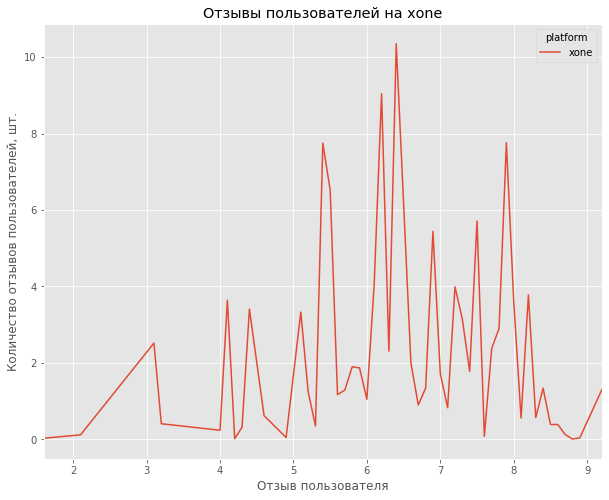

In [57]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (user_score > 0) and platform in ['xone']").pivot_table(index = 'user_score', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Отзывы пользователей на xone')
plt.xlabel('Отзыв пользователя')
plt.ylabel('Количество отзывов пользователей, шт.')
plt.show();

In [58]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['xone']  and critic_score > 0)").sort_values(by='critic_score', ascending = False).head(200)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,m,5.47
2720,metal gear solid v: the phantom pain,xone,2015,action,0.41,0.26,0.01,0.07,95.0,7.3,m,0.75
5388,rayman legends,xone,2014,platform,0.13,0.18,0.00,0.03,91.0,7.9,e10+,0.34
1948,overwatch,xone,2016,shooter,0.63,0.33,0.00,0.10,91.0,5.6,t,1.06
1904,forza horizon 3,xone,2016,racing,0.42,0.58,0.00,0.08,91.0,7.4,e,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...
13054,bladestorm: nightmare,xone,2015,action,0.03,0.02,0.00,0.00,48.0,7.1,t,0.05
14866,mx vs. atv supercross encore,xone,2015,sports,0.02,0.00,0.00,0.00,45.0,NaN,no rating,0.02
9852,tony hawk's pro skater 5,xone,2015,sports,0.09,0.02,0.00,0.01,39.0,2.1,t,0.12
12863,7 days to die,xone,2016,action,0.03,0.02,0.00,0.00,35.0,5.2,m,0.05


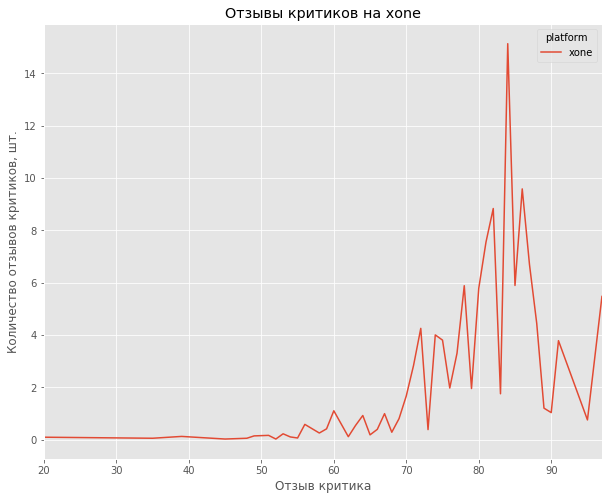

In [59]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (critic_score > 0) and platform in ['xone']").pivot_table(index = 'critic_score', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Отзывы критиков на xone')
plt.xlabel('Отзыв критика')
plt.ylabel('Количество отзывов критиков, шт.')
plt.show();

In [60]:
critics_xone = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['xone']  and critic_score > 0)")
users_xone = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['xone']  and user_score > 0)")
critics_xone
corr_df = pd.DataFrame()
corr_df['critic_score'] = critics_xone['critic_score']
corr_df['user_score'] = users_xone['user_score']
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,44.10%
user_score,44.10%,100.00%


Хотя графики по критикам и пользователям немного отличаются от ps4, вывоод тот же - мнения критиков более важны, нежели пользователей, и они приносят игре доход.
Корреляция в xone меньше 50%. что говорит о некотрых проблемах в продвижениии игр. Этот вопрос следует более детально изучить в дальнейших работах.

Теперь посмотрим на платформу 3ds:

In [61]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['3ds'])").head(20)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,no rating,11.68
96,super smash bros. for wii u and 3ds,3ds,2014,fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,no rating,7.55
108,pokemon sun/moon,3ds,2016,role-playing,2.98,1.45,2.26,0.45,-1.0,-1.0,no rating,7.14
312,monster hunter 4 ultimate,3ds,2014,role-playing,0.68,0.48,2.62,0.11,86.0,8.7,t,3.89
406,monster hunter x,3ds,2015,action,0.27,0.21,2.79,0.05,-1.0,-1.0,no rating,3.32
412,yokai watch 2 ganso/honke,3ds,2014,role-playing,0.09,0.00,3.18,0.01,-1.0,-1.0,no rating,3.28
457,animal crossing: happy home designer,3ds,2015,simulation,0.51,1.02,1.40,0.12,66.0,6.9,e,3.05
563,yokai watch 2 shinuchi,3ds,2014,role-playing,0.00,0.00,2.68,0.00,-1.0,-1.0,no rating,2.68
677,the legend of zelda: majora's mask 3d,3ds,2015,action,1.15,0.55,0.47,0.17,89.0,9.0,e10+,2.34
694,yokai watch busters,3ds,2015,action,0.00,0.00,2.29,0.00,-1.0,-1.0,no rating,2.29


In [62]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['3ds']  and user_score > 0)").sort_values(by='user_score', ascending = False).head(200)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
677,the legend of zelda: majora's mask 3d,3ds,2015,action,1.15,0.55,0.47,0.17,89.0,9.0,e10+,2.34
15211,phoenix wright: ace attorney trilogy,3ds,2014,adventure,0.00,0.00,0.02,0.00,81.0,9.0,t,0.02
952,kirby: triple deluxe,3ds,2014,platform,0.61,0.34,0.79,0.09,80.0,8.8,e,1.83
1596,pokemon super mystery dungeon,3ds,2015,role-playing,0.48,0.35,0.34,0.08,69.0,8.8,e,1.25
14842,the peanuts movie: snoopy's grand adventure,3ds,2015,action,0.00,0.03,0.00,0.00,-1.0,8.8,e,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
13214,metroid prime: federation force,3ds,2016,action,0.02,0.01,0.01,0.00,64.0,5.1,t,0.04
5224,fossil fighters: frontier,3ds,2014,role-playing,0.08,0.04,0.23,0.01,57.0,4.8,e10+,0.36
6193,skylanders: trap team,3ds,2014,action,0.16,0.10,0.00,0.02,-1.0,3.4,e10+,0.28
4279,fifa 15,3ds,2014,sports,0.09,0.34,0.00,0.03,-1.0,2.4,e,0.46


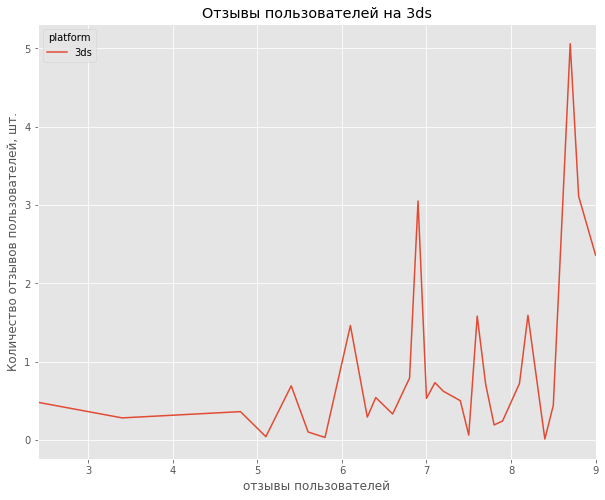

In [63]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (user_score > 0) and platform in ['3ds']").pivot_table(index = 'user_score', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Отзывы пользователей на 3ds')
plt.xlabel('отзывы пользователей')
plt.ylabel('Количество отзывов пользователей, шт.')
plt.show();

In [64]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['3ds']  and critic_score > 0)").sort_values(by='critic_score', ascending = False).head(200)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
9143,shovel knight,3ds,2015,platform,0.08,0.04,0.02,0.01,90.0,8.2,e,0.15
677,the legend of zelda: majora's mask 3d,3ds,2015,action,1.15,0.55,0.47,0.17,89.0,9.0,e10+,2.34
312,monster hunter 4 ultimate,3ds,2014,role-playing,0.68,0.48,2.62,0.11,86.0,8.7,t,3.89
5115,theatrhythm final fantasy: curtain call,3ds,2014,misc,0.13,0.08,0.15,0.02,83.0,8.2,t,0.38
2839,persona q: shadow of the labyrinth,3ds,2014,role-playing,0.34,0.07,0.27,0.04,83.0,8.1,m,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...
6037,sonic boom: shattered crystal,3ds,2014,action,0.17,0.09,0.00,0.03,47.0,6.3,e,0.29
13694,gravity falls: legend of the gnome gemulets,3ds,2015,action,0.03,0.00,0.00,0.00,46.0,5.8,e,0.03
13695,rodea the sky soldier,3ds,2015,action,0.03,0.00,0.00,0.00,45.0,5.6,e10+,0.03
14534,power rangers super megaforce,3ds,2014,action,0.01,0.01,0.00,0.00,43.0,NaN,e10+,0.02


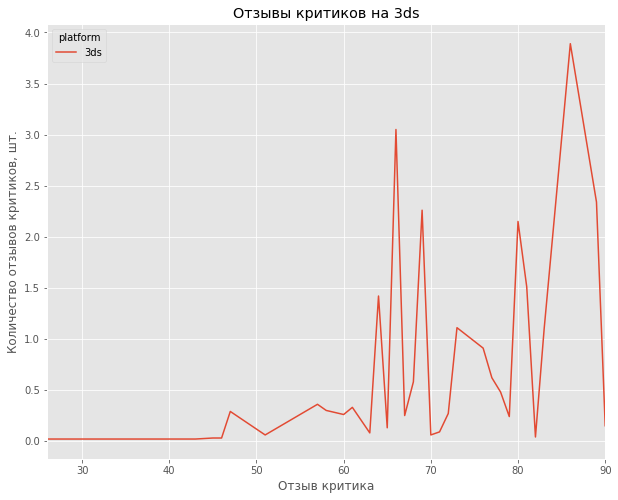

In [65]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (critic_score > 0) and platform in ['3ds']").pivot_table(index = 'critic_score', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()
plt.title('Отзывы критиков на 3ds')
plt.xlabel('Отзыв критика')
plt.ylabel('Количество отзывов критиков, шт.')
plt.show();

Что можно отметить в 3ds, тут мнения пользователей не так сильно варьируются, как на других платформах, и не сильно отличаются от мнений критиков. Проверим корреляцию:

In [66]:
critics_3ds = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['3ds']  and critic_score > 0)")
users_3ds = games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['3ds']  and user_score > 0)")
critics_3ds
corr_df = pd.DataFrame()
corr_df['critic_score'] = critics_3ds['critic_score']
corr_df['user_score'] = users_3ds['user_score']
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,86.25%
user_score,86.25%,100.00%


Что и следовало ожидать, корреляция больше 86%, для разработчиков - это успех.

### 7. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Найдем самые популярные жанры

In [67]:
most_popular_genre = games.groupby('genre').agg({'game_name':'count'}).reset_index()
most_popular_genre.sort_values(by='game_name', ascending=False).head()

,genre,game_name
0,action,3369
11,sports,2348
3,misc,1750
8,role-playing,1498
9,shooter,1323


Найдем самые прибыльные жанрыи и прибыть от них. Видно, что не все популярные жанры самые прибыльные.

In [68]:
most_money_genre = games.groupby('genre').agg({'total_sales':'sum'}).reset_index()
most_money_genre.sort_values(by='total_sales', ascending=False).head()

,genre,total_sales
0,action,1744.17
11,sports,1331.27
9,shooter,1052.45
8,role-playing,934.56
5,platform,827.77


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


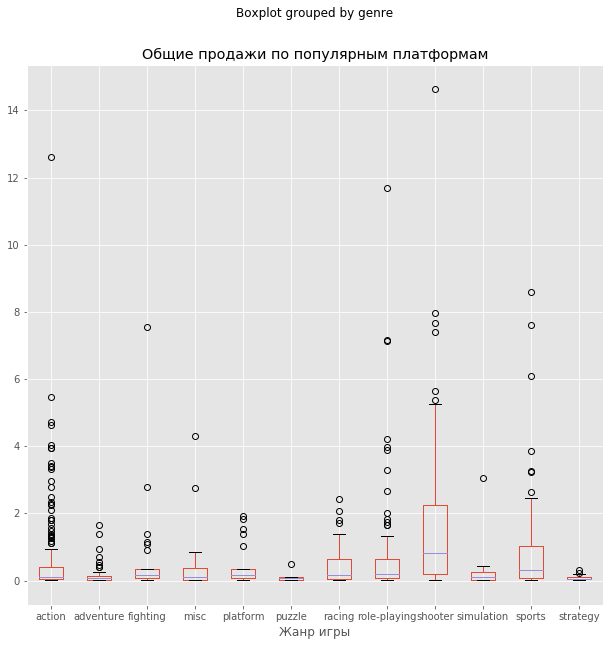

In [69]:
games.query("(year_of_release != 2999) and (year_of_release > 2013) and (platform in ['ps4','3ds','xone'])").boxplot('total_sales', by='genre', figsize=(10,10))
plt.title('Общие продажи по популярным платформам')
plt.xlabel('Жанр игры')
plt.show();

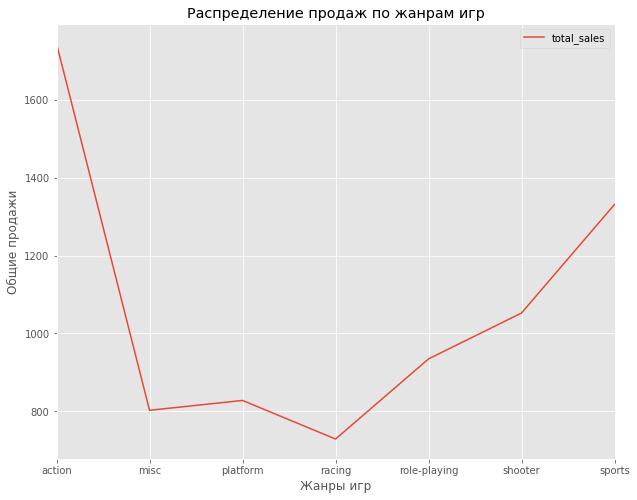

In [70]:
games.groupby('genre').agg({'total_sales':'sum'}).query('total_sales > 700').plot()

plt.title('Распределение продаж по жанрам игр')
plt.xlabel('Жанры игр')
plt.ylabel('Общие продажи')
plt.show();

Из "ящика с усами" и графика мы видим, что самым прибыльным является жанр action и sports. А жанры music, racing и platform не являются такими прибыльными.

Наиболее стафильным по продажам является action, у sports же много выбросов, то есть игры этого жанра не всегдя нравятся пользователям и критикам.

# Шаг 4. Составим портрет пользователя каждого региона

**Для пользователей каждого региона (Северная Америка, Европа и Россия) определим:**

1. топ-5 предпочтительных жанров

2. топ-5 предпочтительных платформ

3. какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

### 1. топ-5 предпочтительных жанров

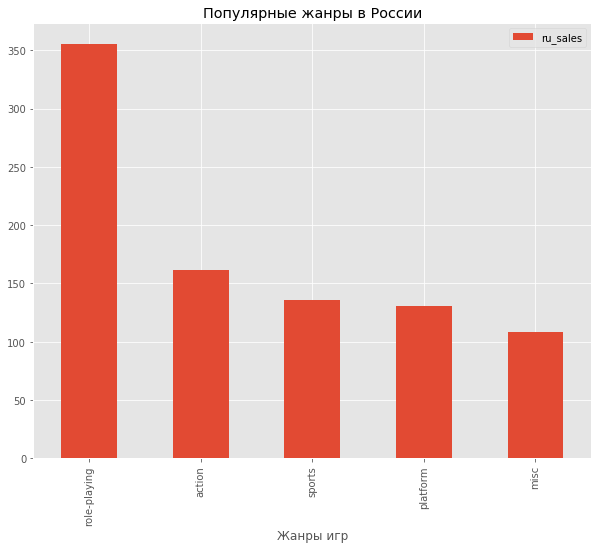

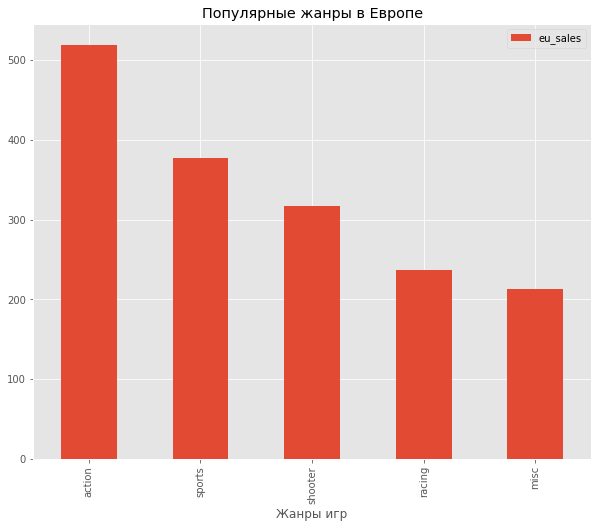

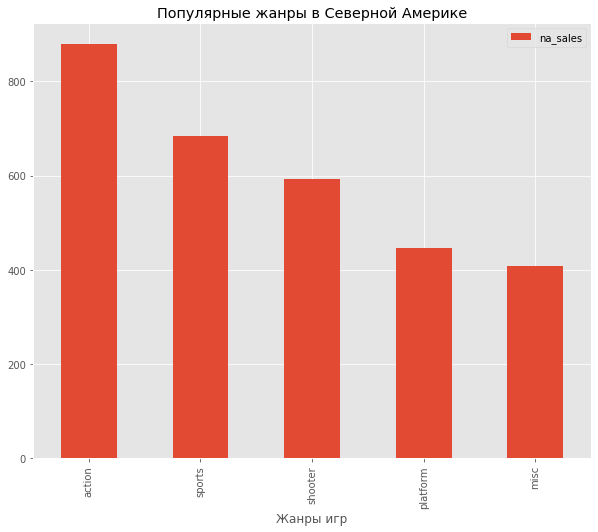

In [71]:
games.groupby(by='genre').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные жанры в России')
plt.xlabel('Жанры игр')
plt.show();
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные жанры в Европе')
plt.xlabel('Жанры игр')
plt.show();
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные жанры в Северной Америке')
plt.xlabel('Жанры игр')
plt.show();

Пользователи в России отличаются от остальных, для них action не самый порулярный жанр, они предпочитают role_playing, который совсем не заходит пользователям других мест. У этого жанра половина всех продаж, соальные жанры примерно поровну делят оставшуюсь половину.

Для Европы и Северной Америки показатели примерно одинаковы, с той разницей, что в Европе любят racing, а Северной Америке - misc.

### 2. топ-5 предпочтительных платформ

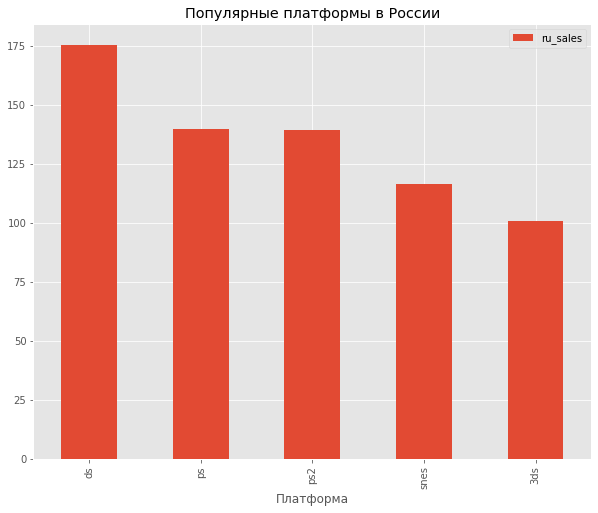

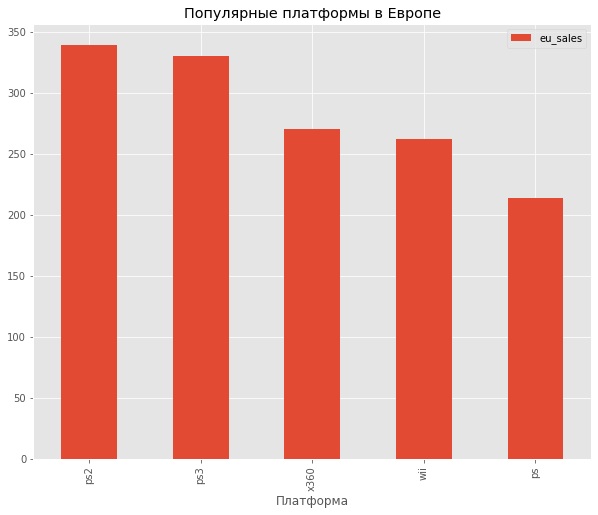

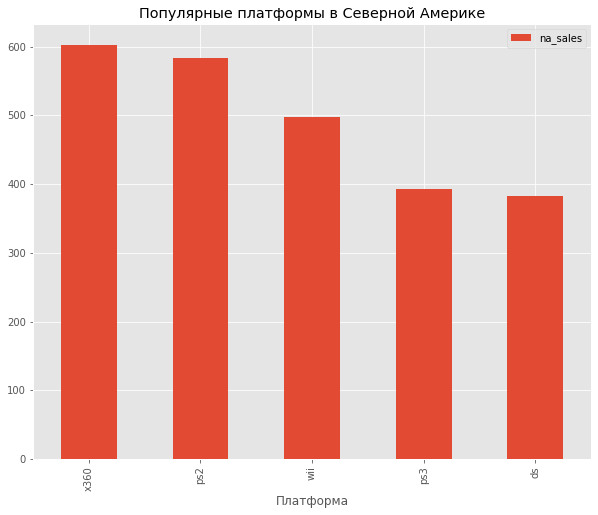

In [72]:
games.groupby(by='platform').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные платформы в России')
plt.xlabel('Платформа')
plt.show();
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные платформы в Европе')
plt.xlabel('Платформа')
plt.show();
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные платформы в Северной Америке')
plt.xlabel('Платформа')
plt.show();

Заметим, что платформа ps встречается во всех областях, что говорит о ее блобальном распространении (сказывается наличие разных версии/переиздании).

В России пользуется популярностью перспективная платформа 3ds, в Северной Америке любая ps, wii, ds и x360.

В Европе любят ps, x360 и wii.

### 3. Влияет ли рейтинг на продажи?

In [73]:
games['rating_type'].unique()

array(['e', 'no rating', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

Для удобства сравнения приведу расшифровку наиболее часто встречающихся рейтингов:

E - для всех

E10+ - Для всех старше 10 лет

K-A	- Для всех(до 1998 года)

AO- Только для взрослых

EC- Для детей младшего возраста

RP- Рейтинг ожидается

M - Для взрослых

T - Подросткам


In [74]:
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38


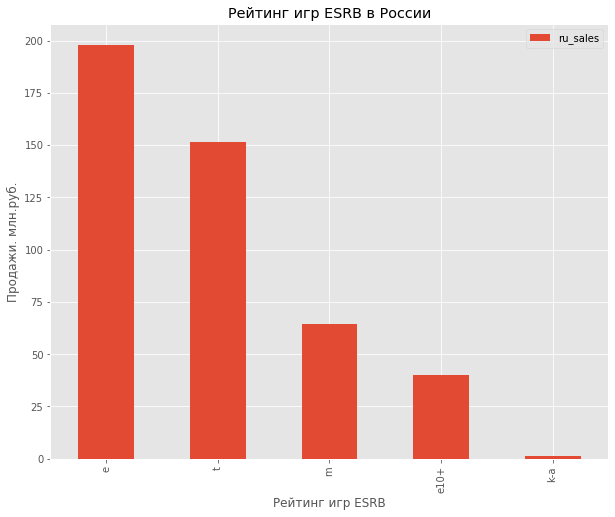

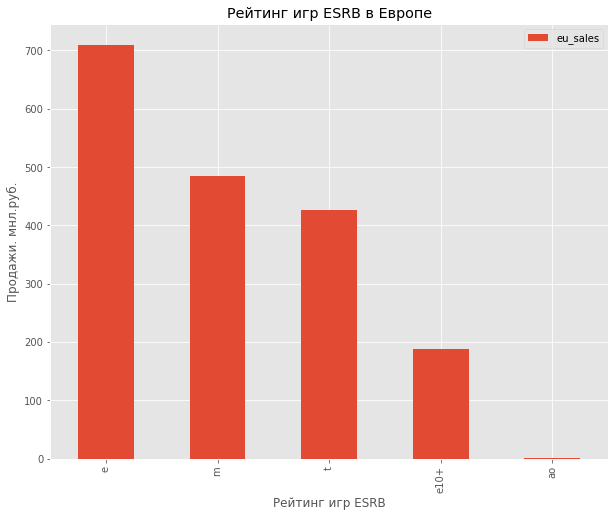

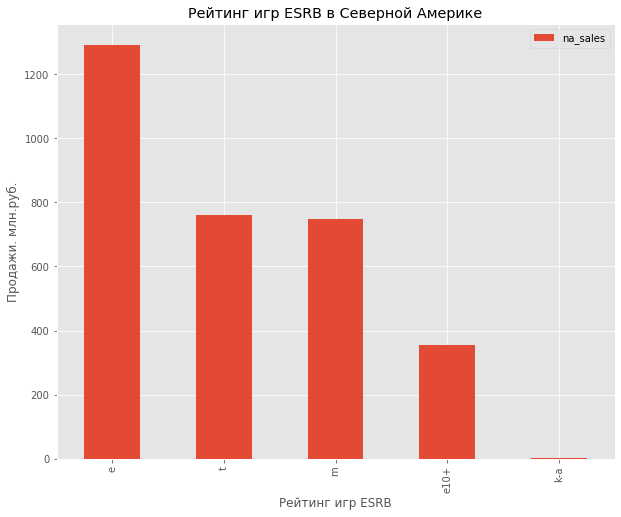

In [75]:
games.query('rating_type != "no rating"').groupby(by='rating_type').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг игр ESRB в России')
plt.xlabel('Рейтинг игр ESRB')
plt.ylabel('Продажи. млн.руб.')
plt.show();
games.query('rating_type != "no rating"').groupby(by='rating_type').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг игр ESRB в Европе')
plt.xlabel('Рейтинг игр ESRB')
plt.ylabel('Продажи. мнл.руб.')
plt.show();           
games.query('rating_type != "no rating"').groupby(by='rating_type').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг игр ESRB в Северной Америке')
plt.xlabel('Рейтинг игр ESRB')
plt.ylabel('Продажи. млн.руб.')
plt.show();           

Самый частотный рейтинг - e (для всех), потом t (для подростков) и m (для взрослых). Также есть е10+ (Для всех старше 10 лет). Различия заметны по последним столбцам, которые по значениям близки к 0, и их можно не учитывать. В целом, рейтинги схожи и продажи, соответственно, тоже.

# Шаг 5. Проверка гипотез

1.средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2.средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:

1. как вы формулировали нулевую и альтернативную гипотезы

2. какой критерий использовали для проверки гипотез и почему

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

**Гипотезы:**

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [76]:
games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [77]:

alpha = 0.05

In [78]:
xone = games[(games['platform'] == 'xone') & (games['user_score'] > 0 & (games['year_of_release'] != 2999) & (games['year_of_release'] > 2013))]['user_score']
pc = games[(games['platform'] == 'pc') & (games['user_score'] > 0 & (games['year_of_release'] != 2999) & (games['year_of_release'] > 2013))]['user_score']

In [79]:
results = st.ttest_ind(xone, pc)

In [80]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги за актуальный период для платформ Xbox One и PC различаются.

**Гипотезы:**

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

In [81]:
action = games[(games['genre'] == 'action') & (games['user_score'] > 0) & (games['year_of_release'] != 2999) & (games['year_of_release'] > 2013)]['user_score']
sports = games[(games['genre'] == 'sports') & (games['user_score'] > 0) & (games['year_of_release'] != 2999) & (games['year_of_release'] > 2013)]['user_score']

In [82]:
results = st.ttest_ind(action, sports)

In [83]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Средний пользовательский рейтинг на актуальный период для жанров Action и Sports различается.

# Шаг 6. Результаты исследования

**Выводы:**

Проанализировав данные по разным платформам мы можем сделать следующие выводы:
    
1. оценки пользователей и критиков по популярным платформам различаются. Отзывы критиков имеют вес в общих продажах по платформе

2. наиболее перспективные платформы ps4, xone и 3ds

3. сейчас наблюдается спад продаж в игровой индустрии, что говорит о том, что в ближайшем времени возможен скачок нового вида игр

4. после выхода игру у нее наблюдается подъем, пик популярности и продаж и спад, исключений нет. Производители игр конкурируют друг с другом и выпускают игры друг за другом, не даавая одному вырваться вперед

5. в России самым популярным жанром игр является role-gaming, чего не наблюдается в Европе и в Северной Америке

6. Разбивка жанров по возрастным рейтингам едина и в разных частях мира пользуются популярностью по польшей части одни и те же типы рейтингой

7. Наиболее популярным жанром является Action и Sports.

**Рекомедации:**

1. Стоит обратить внимание на пропуски в отзывах от пользователй и критиков, это мешает анализу и может привести к неправильной интерпретации настроения любителй игр.

2. Стоит указывать источники отзывов, так как сейчас невозможно проверить их правдивость